In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data_path = "../../data/raw/dataset_clean.csv"  # Adjust the path if necessary
df = pd.read_csv(data_path)

# Drop unnecessary columns like unnamed indices (if applicable)
df.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

# Inspect the data
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1348 non-null   object 
 1   price_tnd            1348 non-null   float64
 2   price_eur            1348 non-null   float64
 3   location             1348 non-null   object 
 4   city                 1348 non-null   int64  
 5   Area                 1348 non-null   float64
 6   pieces               1348 non-null   float64
 7   room                 1348 non-null   float64
 8   bathroom             1348 non-null   float64
 9   age                  1348 non-null   object 
 10  state                1348 non-null   float64
 11  latt                 1348 non-null   float64
 12  long                 1348 non-null   float64
 13  distance_to_capital  1348 non-null   float64
 14  garage               1348 non-null   float64
 15  garden               1348 non-null   f

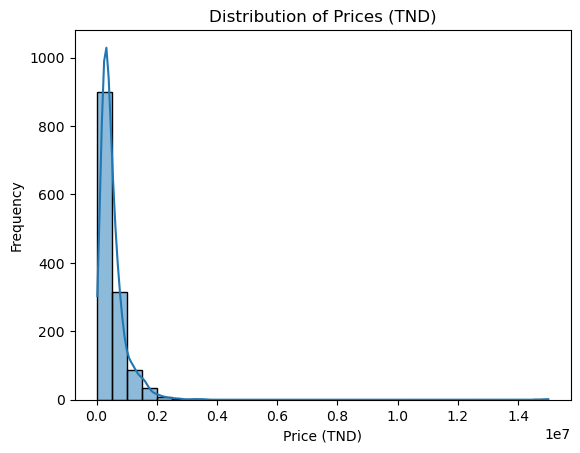

In [8]:
sns.histplot(df['price_tnd'], kde=True, bins=30)
plt.title("Distribution of Prices (TND)")
plt.xlabel("Price (TND)")
plt.ylabel("Frequency")
plt.show()


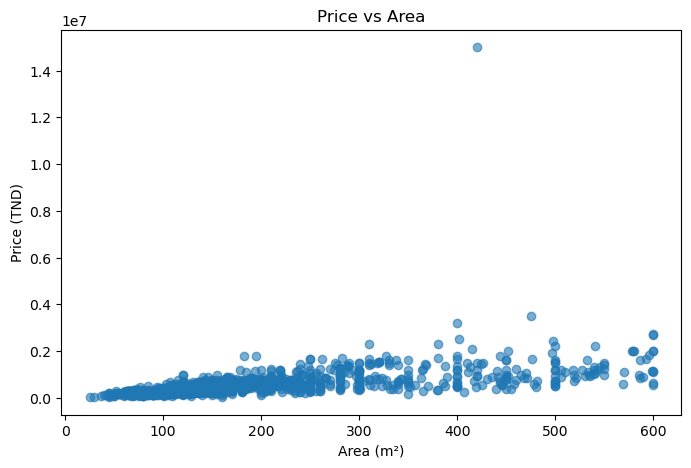

In [9]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Area'], df['price_tnd'], alpha=0.6)
plt.title("Price vs Area")
plt.xlabel("Area (m²)")
plt.ylabel("Price (TND)")
plt.show()


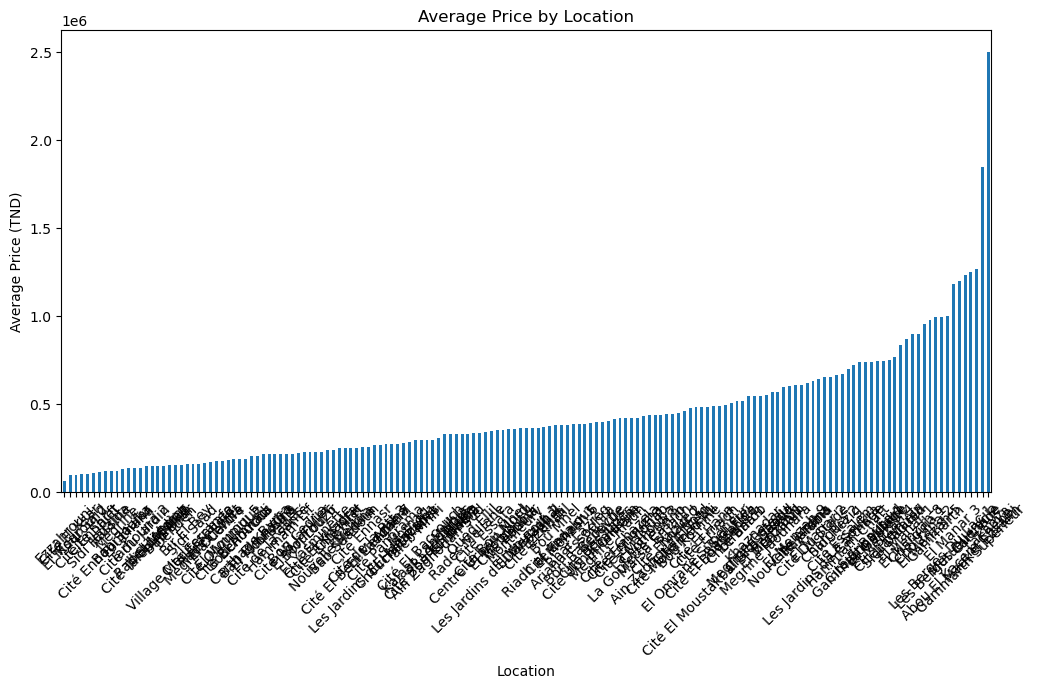

In [10]:
avg_price_by_location = df.groupby('location')['price_tnd'].mean().sort_values()
avg_price_by_location.plot(kind='bar', figsize=(12, 6))
plt.title("Average Price by Location")
plt.xlabel("Location")
plt.ylabel("Average Price (TND)")
plt.xticks(rotation=45)
plt.show()


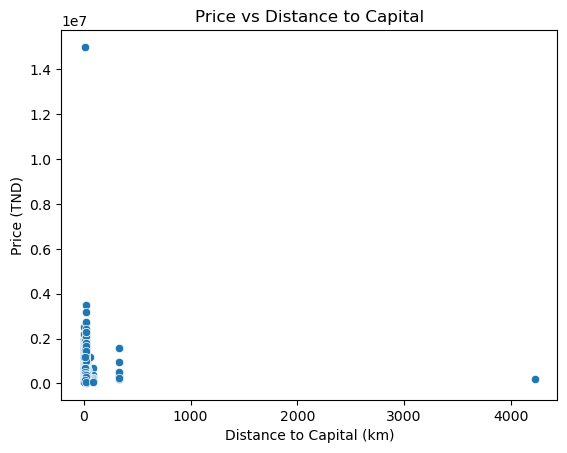

In [11]:
sns.scatterplot(data=df, x='distance_to_capital', y='price_tnd')
plt.title("Price vs Distance to Capital")
plt.xlabel("Distance to Capital (km)")
plt.ylabel("Price (TND)")
plt.show()


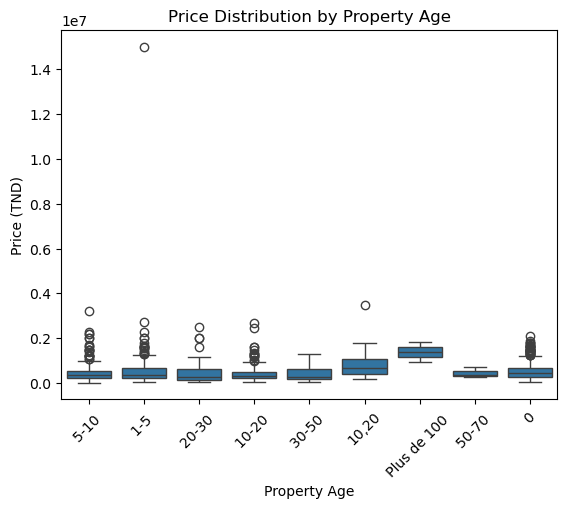

In [12]:
sns.boxplot(data=df, x='age', y='price_tnd')
plt.title("Price Distribution by Property Age")
plt.xlabel("Property Age")
plt.ylabel("Price (TND)")
plt.xticks(rotation=45)
plt.show()


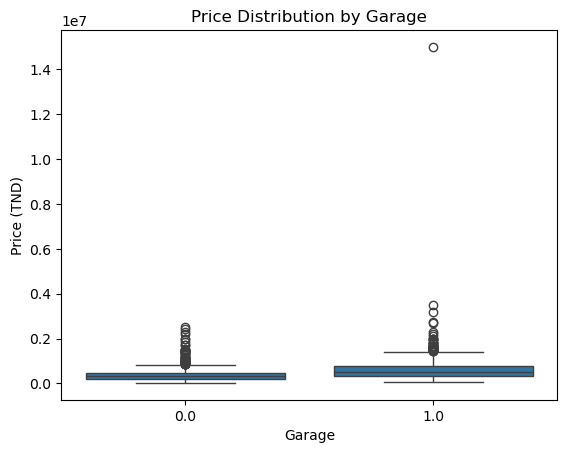

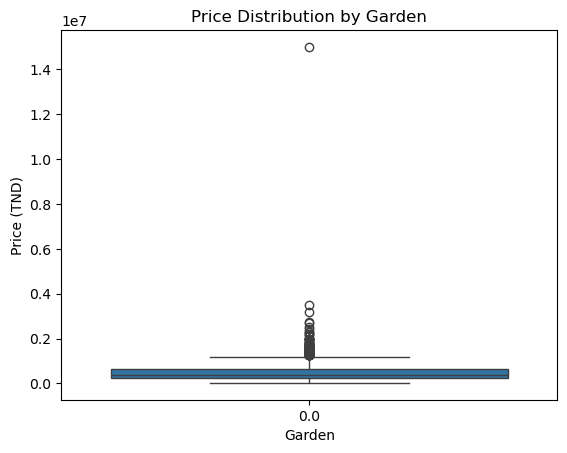

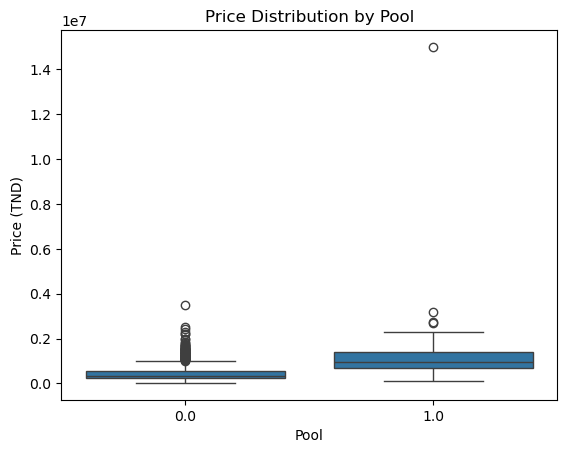

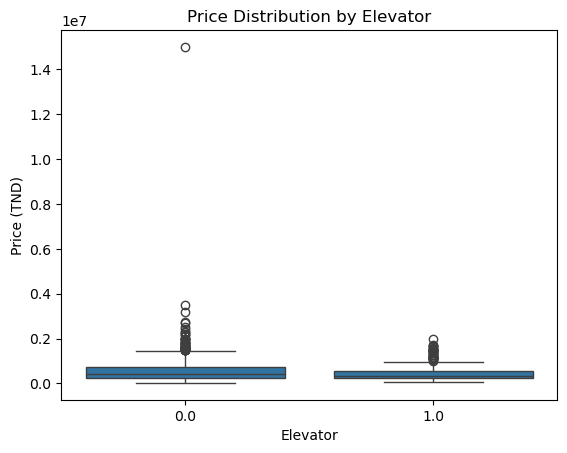

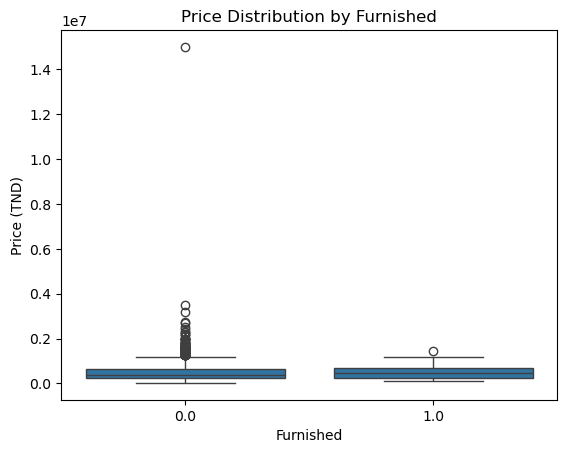

In [13]:
additional_features = ['garage', 'garden', 'pool', 'elevator', 'furnished']

for feature in additional_features:
    sns.boxplot(data=df, x=feature, y='price_tnd')
    plt.title(f"Price Distribution by {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Price (TND)")
    plt.show()


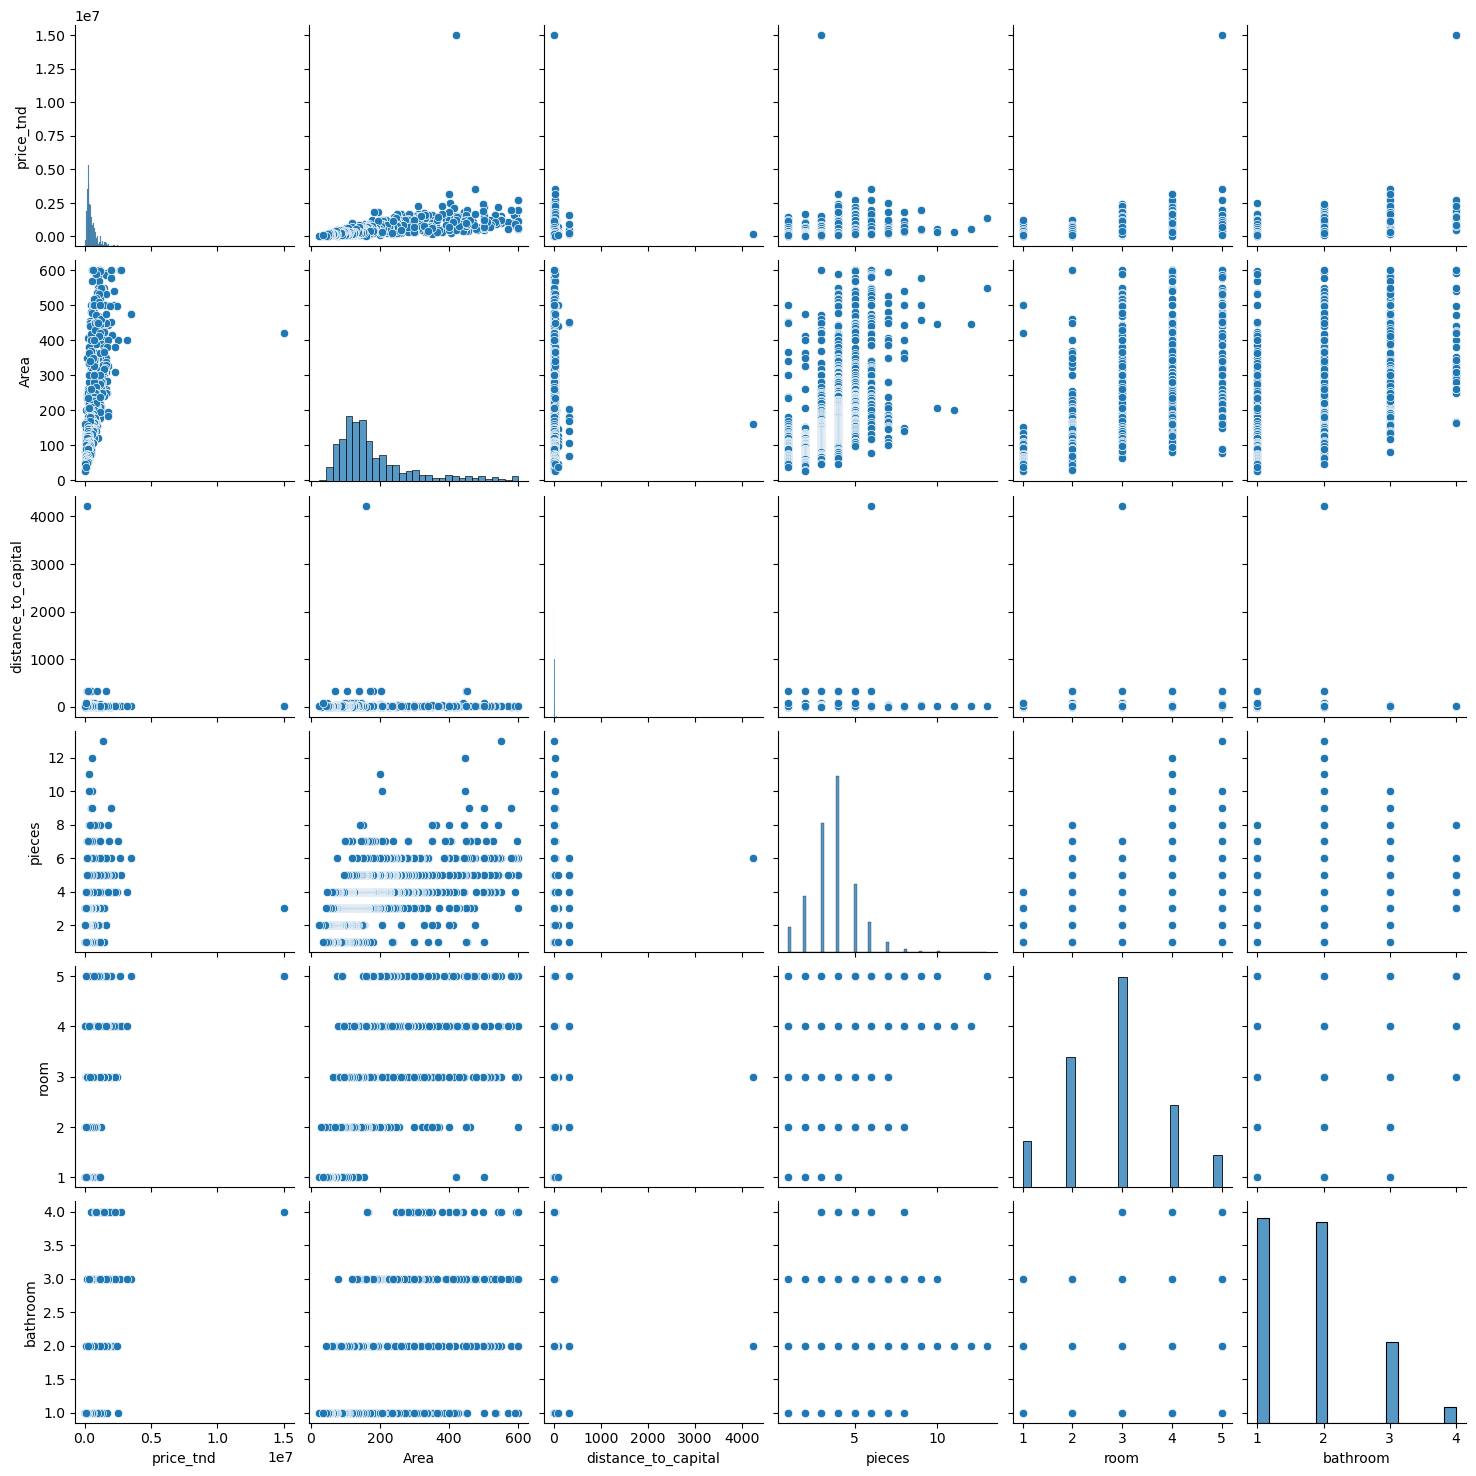

In [14]:
selected_features = ['price_tnd', 'Area', 'distance_to_capital', 'pieces', 'room', 'bathroom']
sns.pairplot(df[selected_features])
plt.show()


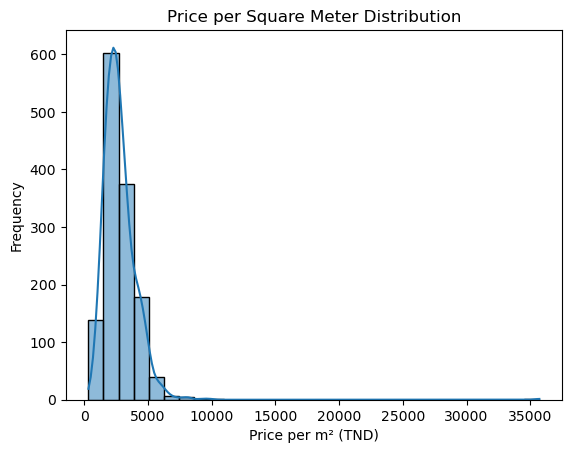

In [15]:
     df['price_per_m2'] = df['price_tnd'] / df['Area']

sns.histplot(df['price_per_m2'], kde=True, bins=30)
plt.title("Price per Square Meter Distribution")
plt.xlabel("Price per m² (TND)")
plt.ylabel("Frequency")
plt.show()


In [20]:
# Select only numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_features)


Index(['price_tnd', 'price_eur', 'city', 'Area', 'pieces', 'room', 'bathroom',
       'state', 'latt', 'long', 'distance_to_capital', 'garage', 'garden',
       'concierge', 'beach_view', 'mountain_view', 'pool', 'elevator',
       'furnished', 'equipped_kitchen', 'central_heating', 'air_conditioning'],
      dtype='object')


In [21]:
# Example: Pairwise correlation between 'price_tnd' and 'Area'
correlation_price_area = df['price_tnd'].corr(df['Area'])
print(f"Correlation between price_tnd and Area: {correlation_price_area:.2f}")

# Compute other pairwise correlations
correlation_price_distance = df['price_tnd'].corr(df['distance_to_capital'])
print(f"Correlation between price_tnd and distance_to_capital: {correlation_price_distance:.2f}")


Correlation between price_tnd and Area: 0.56
Correlation between price_tnd and distance_to_capital: -0.01


In [22]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)


                     price_tnd  price_eur      city      Area    pieces  \
price_tnd             1.000000   1.000000 -0.247985  0.555382  0.269725   
price_eur             1.000000   1.000000 -0.247985  0.555382  0.269725   
city                 -0.247985  -0.247985  1.000000 -0.091120 -0.016488   
Area                  0.555382   0.555382 -0.091120  1.000000  0.540379   
pieces                0.269725   0.269725 -0.016488  0.540379  1.000000   
room                  0.370559   0.370559  0.039069  0.607508  0.729885   
bathroom              0.469063   0.469063 -0.227097  0.510391  0.451683   
state                -0.023136  -0.023136 -0.107120 -0.221583 -0.166103   
latt                  0.025955   0.025955 -0.101616  0.002981 -0.042367   
long                  0.052397   0.052397 -0.171328 -0.006902 -0.050673   
distance_to_capital  -0.013459  -0.013459  0.060615 -0.002316  0.042032   
garage                0.200942   0.200942 -0.046642  0.259294  0.174975   
garden                   

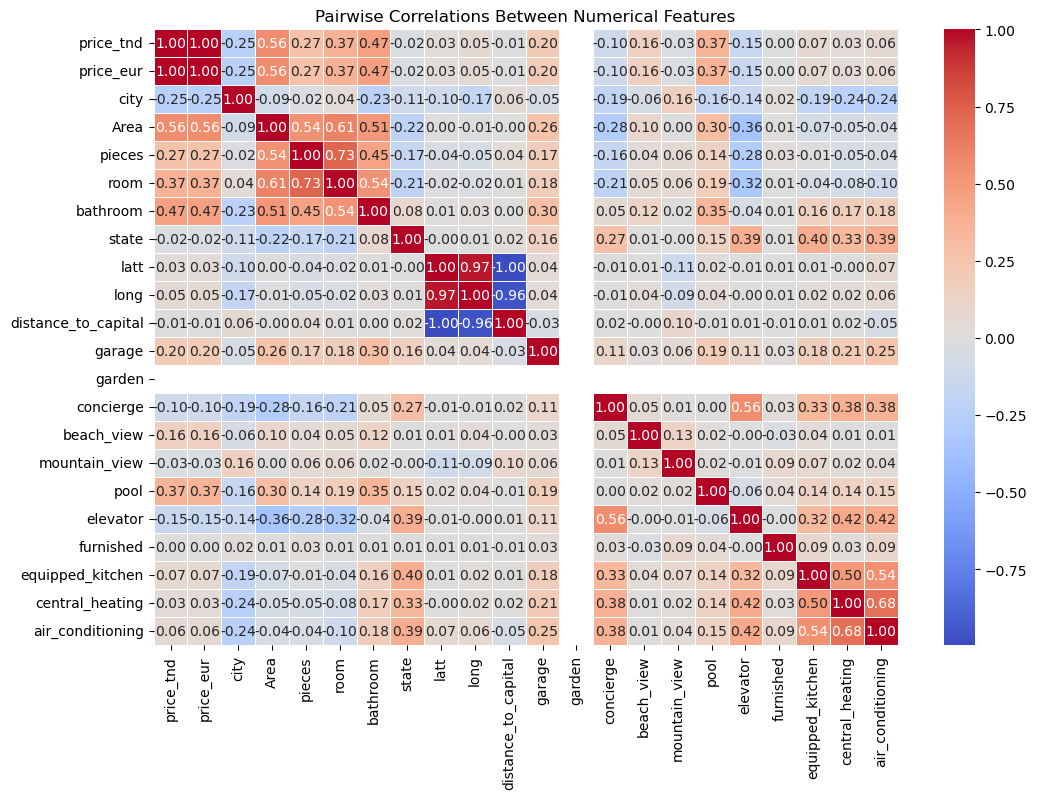

In [23]:
# Heatmap for pairwise correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Pairwise Correlations Between Numerical Features")
plt.show()

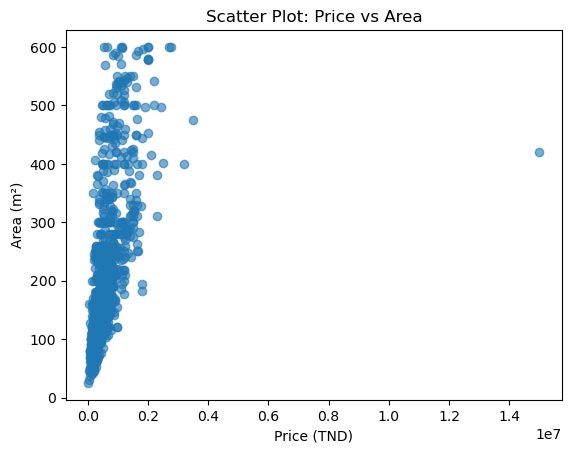

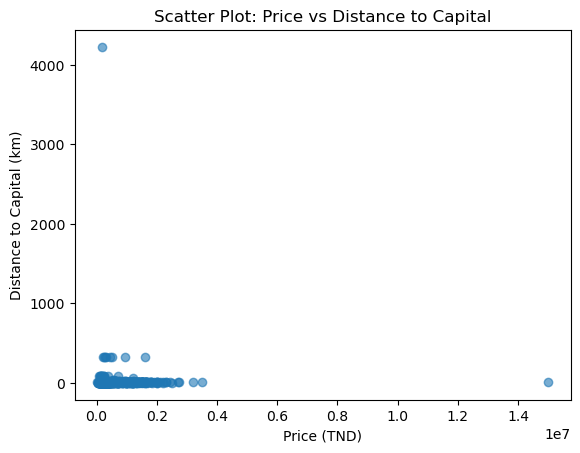

In [24]:
# Scatter plot between 'price_tnd' and 'Area'
plt.scatter(df['price_tnd'], df['Area'], alpha=0.6)
plt.title("Scatter Plot: Price vs Area")
plt.xlabel("Price (TND)")
plt.ylabel("Area (m²)")
plt.show()

# Scatter plot between 'price_tnd' and 'distance_to_capital'
plt.scatter(df['price_tnd'], df['distance_to_capital'], alpha=0.6)
plt.title("Scatter Plot: Price vs Distance to Capital")
plt.xlabel("Price (TND)")
plt.ylabel("Distance to Capital (km)")
plt.show()


In [ ]:
# Pairplot for all numerical features
sns.pairplot(df[numerical_features])
plt.show()


In [ ]:
# Filter correlations greater than a threshold (e.g., 0.8)
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]  # Remove self-correlations
print(high_corr_pairs[high_corr_pairs > 0.8])
